# Import libraries

In [ ]:
!pip install --upgrade pip --quiet
!pip install yfinance --quiet

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Rolling Dice

In [ ]:
dice = pd.DataFrame([1, 2, 3, 4, 5, 6])
trial = 50

# Roll two dice and take the sum, repeat for 50 times 
results = [dice.sample(n=2, replace=True).sum().loc[0] for i in range(trial)]

# View the first 20 output 
print(results[:20])

[8, 5, 7, 5, 5, 2, 7, 12, 3, 9, 5, 11, 11, 7, 8, 8, 7, 7, 8, 8]


# Frequency Count

In [ ]:
# Summarise the results of sum of faces by frequency 

# Transform the results into a DataFrame 
freq = pd.DataFrame(results, columns=['Counts'])

freq

,Counts
0,8
1,5
2,7
3,5
4,5
5,2
6,7
7,12
8,3
9,9


In [ ]:
# Count by value, and remove the header name 
freq = freq['Counts'].value_counts()

# Sort by index (Dice roll result) 
sort_freq = freq.sort_index()

sort_freq

2      1
3      2
4      2
5     10
6      4
7      8
8     10
9      6
10     2
11     3
12     2
Name: Counts, dtype: int64

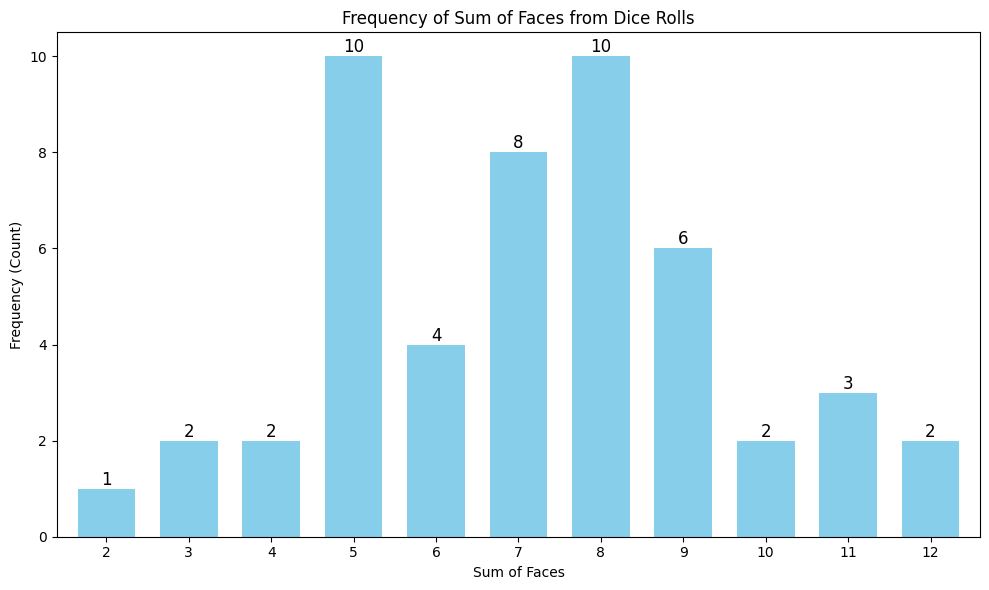

In [ ]:
# Plot the sorted frequency result
plt.figure(figsize=(10, 6))

bars = sort_freq.plot(kind='bar', color='skyblue', width=0.7)

# Add value labels on top of each bar showing the frequency
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{int(height)}', ha='center', va='bottom', fontsize=12)

plt.xlabel('Sum of Faces')
plt.ylabel('Frequency (Count)')
plt.title('Frequency of Sum of Faces from Dice Rolls')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

# Relative Frequency

In [ ]:
relative_freq = sort_freq / trial
relative_freq

2     0.02
3     0.04
4     0.04
5     0.20
6     0.08
7     0.16
8     0.20
9     0.12
10    0.04
11    0.06
12    0.04
Name: Counts, dtype: float64

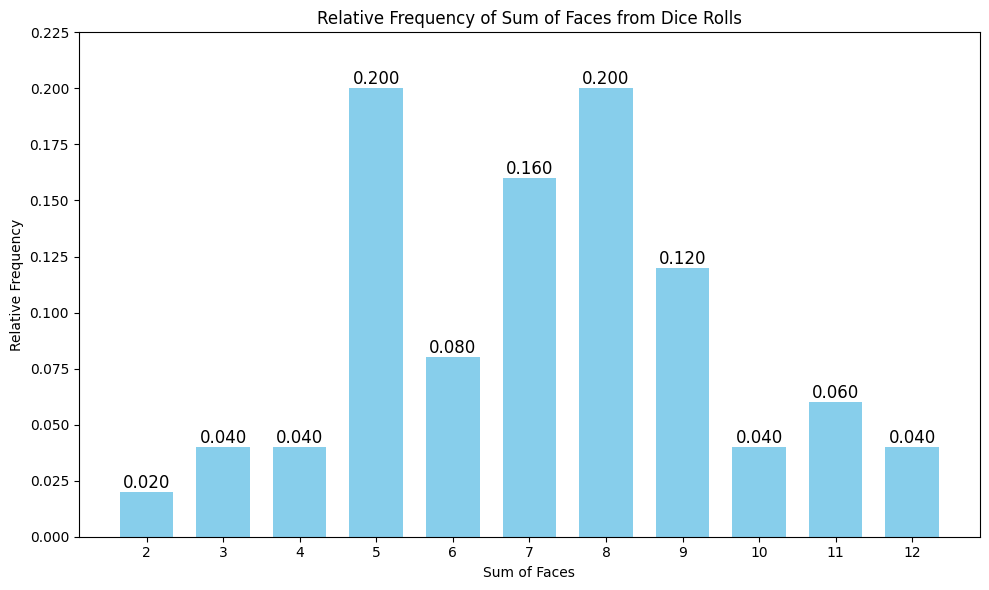

In [ ]:
# Plot the relative frequency result
plt.figure(figsize=(10, 6))
bars = plt.bar(relative_freq.index, relative_freq.values, color='skyblue', width=0.7)

# Add value labels on top of each bar showing the relative frequency
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             f'{height:.3f}', ha='center', va='bottom', fontsize=12)

plt.xlabel('Sum of Faces')
plt.ylabel('Relative Frequency')
plt.title('Relative Frequency of Sum of Faces from Dice Rolls')
plt.xticks(relative_freq.index)
plt.ylim(0, 0.225)

plt.tight_layout()
plt.show()

# Probability Distribution 

In [ ]:
# Assume we have a fair dice 
# Meaning all faces will be shown with equal probabilities 

dice_distri_prob = pd.DataFrame(index=[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

# Define the probabilities for each outcome
probabilities = [1, 2, 3, 4, 5, 6, 5, 4, 3, 2, 1]

In [ ]:
# Normalize the probabilities by dividing them by the total number of outcomes (36 for two dice rolls)
probabilities_normalized = [prob / 36 for prob in probabilities]

# Add the normalized probabilities to the DF
dice_distri_prob['Prob'] = probabilities_normalized

dice_distri_prob

,Prob
2,0.027778
3,0.055556
4,0.083333
5,0.111111
6,0.138889
7,0.166667
8,0.138889
9,0.111111
10,0.083333
11,0.055556


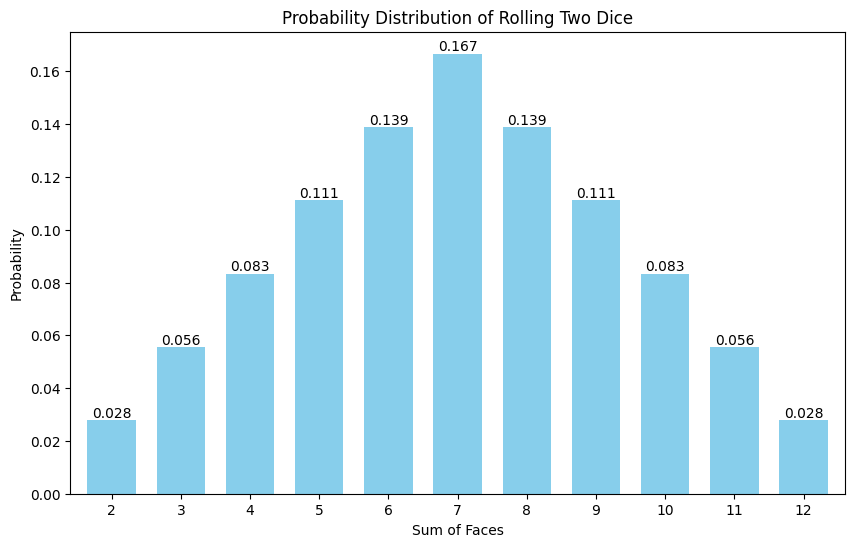

In [ ]:
# Plot the probability distribution

plt.figure(figsize=(10, 6))
ax = dice_distri_prob['Prob'].plot(kind='bar', color='skyblue', width=0.7)

ax.set_xlabel('Sum of Faces')
ax.set_ylabel('Probability')
plt.title('Probability Distribution of Rolling Two Dice')

for index, value in enumerate(probabilities_normalized):
    ax.text(index, value, f'{value:.3f}', ha='center', va='bottom')

plt.xticks(rotation=0)

plt.show()

# Central Limit Theorem

In [ ]:
# Make this into a function with the input of number of trial 

def rolling_dice_sampling(trial):
    dice = pd.DataFrame([1, 2, 3, 4, 5, 6])
    results = [dice.sample(n=2, replace=True).sum().loc[0] for i in range(trial)]
    
    # Transform the results into a DataFrame
    freq = pd.DataFrame(results, columns=['Counts'])
    
    # Count by value and remove the header name
    freq = freq['Counts'].value_counts().rename_axis(None)
    
    # Sort by index
    sort_freq = freq.sort_index()
    
    # Calculate relative frequencies
    relative_freq = sort_freq / trial

    return relative_freq

In [ ]:
trial_100 = rolling_dice_sampling(100)
trial_500 = rolling_dice_sampling(500)
trial_1000 = rolling_dice_sampling(1000)
trial_2000 = rolling_dice_sampling(2000)
trial_3000 = rolling_dice_sampling(3000)
trial_5000 = rolling_dice_sampling(5000)

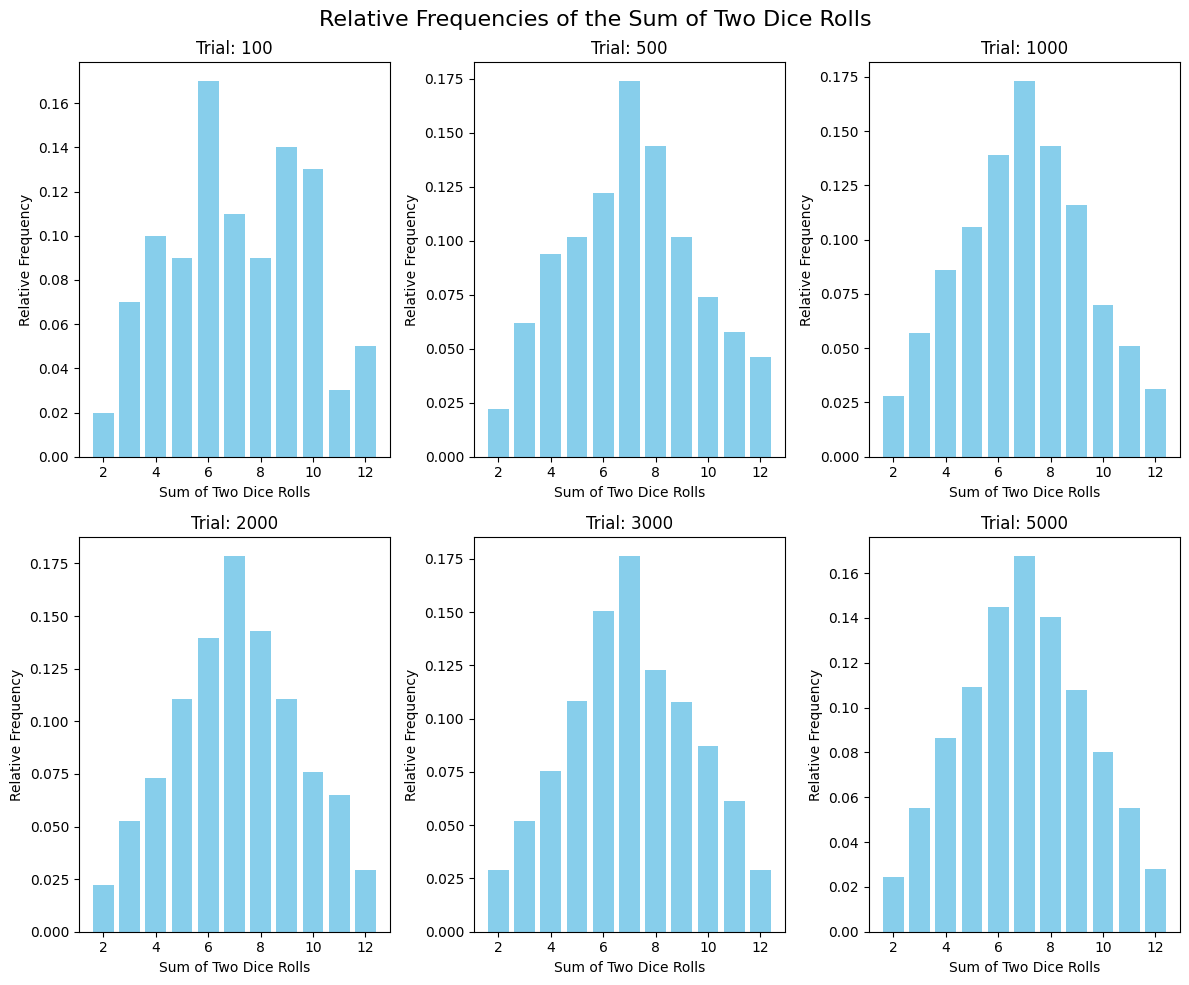

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(12, 10))
fig.suptitle('Relative Frequencies of the Sum of Two Dice Rolls', fontsize=16)

# Plot trial_100
ax[0, 0].bar(trial_100.index, trial_100.values, color='skyblue')
ax[0, 0].set_xlabel('Sum of Two Dice Rolls')
ax[0, 0].set_ylabel('Relative Frequency')
ax[0, 0].set_title('Trial: 100')

# Plot trial_500
ax[0, 1].bar(trial_500.index, trial_500.values, color='skyblue')
ax[0, 1].set_xlabel('Sum of Two Dice Rolls')
ax[0, 1].set_ylabel('Relative Frequency')
ax[0, 1].set_title('Trial: 500')

# Plot trial_1000
ax[0, 2].bar(trial_1000.index, trial_1000.values, color='skyblue')
ax[0, 2].set_xlabel('Sum of Two Dice Rolls')
ax[0, 2].set_ylabel('Relative Frequency')
ax[0, 2].set_title('Trial: 1000')

# Plot trial_2000
ax[1, 0].bar(trial_2000.index, trial_2000.values, color='skyblue')
ax[1, 0].set_xlabel('Sum of Two Dice Rolls')
ax[1, 0].set_ylabel('Relative Frequency')
ax[1, 0].set_title('Trial: 2000')

# Plot trial_3000
ax[1, 1].bar(trial_3000.index, trial_3000.values, color='skyblue')
ax[1, 1].set_xlabel('Sum of Two Dice Rolls')
ax[1, 1].set_ylabel('Relative Frequency')
ax[1, 1].set_title('Trial: 3000')

# Plot trial_5000
ax[1, 2].bar(trial_5000.index, trial_5000.values, color='skyblue')
ax[1, 2].set_xlabel('Sum of Two Dice Rolls')
ax[1, 2].set_ylabel('Relative Frequency')
ax[1, 2].set_title('Trial: 5000')

plt.tight_layout()
plt.show()

# Example: Stock Return

In [ ]:
sp500_data = yf.download('^GSPC', start='2010-01-01', end='2023-10-01')

# Calculate daily returns
sp500_data['Daily_Return'] = sp500_data['Close'].pct_change()
sp500_data = sp500_data.dropna()

[*********************100%%**********************]  1 of 1 completed


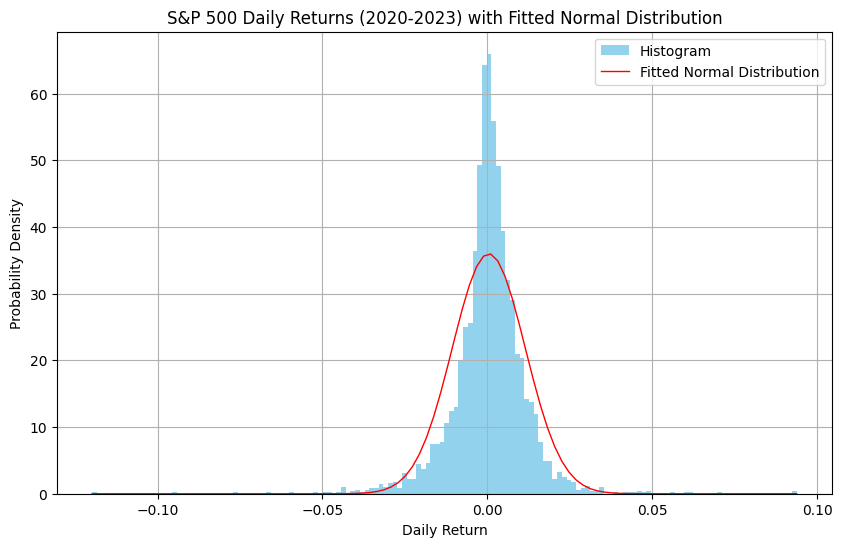

In [ ]:
# Plot a histogram of daily returns
plt.figure(figsize=(10, 6))
plt.hist(sp500_data['Daily_Return'], bins=150, color='skyblue', density=True, alpha=0.9, label='Histogram')

# Calculate mean and standard deviation of daily returns
mu, std = norm.fit(sp500_data['Daily_Return'])

# Create a range of x values for the normal distribution curve
x = np.linspace(min(sp500_data['Daily_Return']), max(sp500_data['Daily_Return']), 100)
pdf = norm.pdf(x, mu, std)

# Plot the fitted normal distribution
plt.plot(x, pdf, linewidth=1, color='red', label='Fitted Normal Distribution')

plt.title('S&P 500 Daily Returns (2020-2023) with Fitted Normal Distribution')
plt.xlabel('Daily Return')
plt.ylabel('Probability Density')
plt.grid(True)
plt.legend()
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5e01a505-6d48-417a-bc3e-f7d4454a4c8e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>